<a href="https://colab.research.google.com/github/VidyaGanes/Hackathon/blob/main/Hackathon_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q -U google-generativeai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.2/164.2 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 718.3/718.3 kB 25.6 MB/s eta 0:00:00


In [ ]:
import google.generativeai as genai

In [ ]:
# Used to securely store your API key
from google.colab import userdata

In [ ]:
# Or use `os.getenv('GOOGLE_API_KEY')` to fetch an environment variable.
GOOGLE_API_KEY=userdata.get('gemini')

genai.configure(api_key=GOOGLE_API_KEY)

1/1 [==============================] - 1s 891ms/step
Detected category: hotdog
The image features a realistically rendered hot dog made out of what appears to be clay or a similar material. 

* There's no visible branding on the hot dog itself. 
* The design features a plump, reddish-brown sausage nestled in a bright orange bun. The bun is detailed with small white specks to mimic sesame seeds. 
* A generous zigzag of yellow mustard tops the sausage, adding a pop of color and further emphasizing the food's texture. 

The image is simple yet effectively conveys the appetizing qualities of a classic hot dog. 



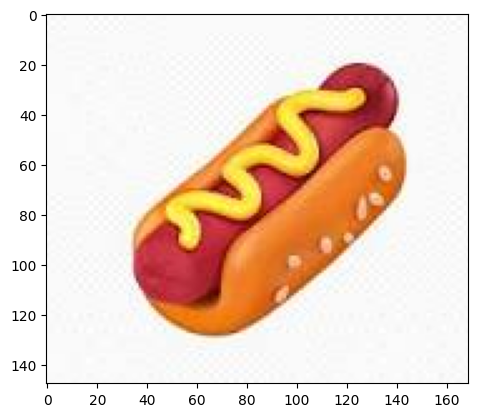

In [18]:
from PIL import Image
import tensorflow as tf
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np

def load_image(path):
    """Loads an image from the specified path using Pillow.

    Args:
        path: The path to the image file.

    Returns:
        The loaded image object, or None if loading fails.
    """
    try:
        img = Image.open(path)
        return img
    except Exception as e:
        print(f"Error loading image: {path} - {e}")
        return None

def classify_image(img):
    """Classifies the image using a pre-trained MobileNetV2 model.

    Args:
        img: The image object.

    Returns:
        The top predicted category.
    """
    model = MobileNetV2(weights='imagenet')
    img = img.resize((224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    predictions = model.predict(img_array)
    decoded_predictions = decode_predictions(predictions, top=1)[0][0]
    return decoded_predictions[1]  # Return the category name

def should_filter_category(category, filter_categories):
    """Determines if the category should be filtered out.

    Args:
        category: The category name.
        filter_categories: A list of categories to filter out.

    Returns:
        True if the category should be filtered out, False otherwise.
    """
    return category in filter_categories

# Load the image
image_path = "hotdog.jfif"
image_data = load_image(image_path)

# Define categories to filter out
filter_categories = [
    "cellular telephone", "laptop", "notebook", "monitor", "television",
    "desktop computer", "sunglass", "handbag", "wallet", "shoe", "refrigerator",
    "washing machine", "microwave", "electric toothbrush", "hair dryer",
    "shaver", "toy", "chair", "desk", "can", "snack"
]

# Classify the image
if image_data:
    category = classify_image(image_data)
    print(f"Detected category: {category}")

    if should_filter_category(category, filter_categories):
        print(f"Image belongs to the filtered category: {category}. Skipping generative model processing.")
    else:
        # Create the generative model object
        model = genai.GenerativeModel("gemini-1.5-pro-latest")

        # Craft the prompt describing the image
        prompt = f"Analyze the image and describe the most prominent object in it. Include details like brand, design elements, and any text visible on the product."

        # Generate content based on the prompt and image
        response = model.generate_content([prompt, image_data])

        # Process the response
        for chunk in response:
            print(chunk.text)
            %matplotlib inline
            import matplotlib.pyplot as plt
            import matplotlib.image as mpimg
            img = mpimg.imread(image_path)
            imgplot = plt.imshow(img)
            plt.show()
